In [ ]:
#Step 0. 분석 가설 만들기
#데이터를 이용한 서비스 도입하기 
#택시이용 활성화 방안 찾기



#1. 리워드 만들기 
    #특정 변수와 Tip변수의 양의 상관관계를 확인하여, Tip을 줄 때 허들없이 지불하게 하고, 이에 따른 리워드 지급 (ex.카드를 쓰시고 x달러 이상 tip을 주시는 분께는 리워드 지급!)
    #상관관계 분석 변수 : 타는시간, 승객수, 타는거리, 페이방법

#1. 쿠폰 발급  
#미터당 택시비 지불 가격이 높아지는 구간을 확인하여, 몇 미터 이상에서 쿠폰을 발급할지 결정
    #소비자에 장거리 이용에 메리트를 주고 재탑승 유도
    #짧은거리만 반복하는 사람들로 인해 기사의 피로도 감소시키기



In [99]:
#Step 1. 데이터 살펴보기
#데이터 및 필요한 모듈 불러오기
import pandas as pd
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt

df_taxi =pd.read_csv('trip.csv')        #택시요금 관련 데이터 첫 5행, 마지막 5행 확인 
df_taxi

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [100]:
#데이터 정보 확인
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [101]:
df_taxi.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [102]:
#분석 주제에 따른, 필요없는 열 삭제하기 
df_taxi = df_taxi.drop(columns=['passenger_name', 'tolls_amount'])

In [103]:
#Step2. 결측치 확인하기
df_taxi.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
dtype: int64

In [104]:
df_taxi.isna().mean()

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
dtype: float64

In [105]:
#결측치가 있는 부분 출력하고 index저장하기
df_missing_fare_amount = df_taxi[df_taxi['fare_amount'].isna()]
df_missing_fare_amount.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount
52,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0
189,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0
244,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0


In [106]:
#fare_amount에 대한 결측치 처리 하기 
#결측치가 0.000132로 적은 부분을 차지 하기 때문에 삭제 
df_taxi = df_taxi.dropna(subset=['fare_amount'])

In [107]:
#결측치가 제대로 삭제되었는지 확인
df_taxi['fare_amount'].isna().mean()

np.float64(0.0)

In [108]:
#Step 3. 아웃라이너 처리하기 
#describe로 데이터 범위 감잡기

df_taxi.describe()

,passenger_count,trip_distance,fare_amount,tip_amount
count,22698.000000,22698.000000,22698.000000,22698.000000
mean,1.643581,2.912318,13.024009,1.835327
std,1.304983,3.651335,13.240074,2.800093
min,0.000000,0.000000,-120.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000
50%,1.000000,1.610000,9.500000,1.350000
75%,2.000000,3.060000,14.500000,2.450000
max,36.000000,33.960000,999.990000,200.000000


In [109]:
#이상치 확인 : passenger_count, trip_distance, fare_amount, tip_amount
#이상치가 확인된 데이터 들에 대하여 정렬 및 plot을 통한 아웃라이어 처리 여부 결정하기

In [110]:
#passenger_count의 아웃라이어 확인
#passanger 0인 경우가 어느정도 차지 하는지 확인
df_taxi['passenger_count'].value_counts()
#36(0.004%)과 0(0.15%)명은 삭제 

passenger_count
1     16117
2      3305
5      1143
3       952
6       692
4       455
0        33
36        1
Name: count, dtype: int64

In [111]:
#passenger_count의 아웃라이어 삭제 
df_taxi = df_taxi[~df_taxi['passenger_count'].isin([0, 36])]

In [112]:
#trip_ditance의 아웃라이어_trip_distance가 0인 경우 삭제하기 ; 실제 운행 여부를 확인할 수 없음
#비중이 1%도 차지 하지 않기 때문에 삭제
(df_taxi['trip_distance'] == 0).mean() * 100

np.float64(0.6486057183198024)

In [113]:
#trip_distance에서 0값 삭제하기
df_taxi = df_taxi[~(df_taxi['trip_distance'] == 0)]

In [114]:
#fare_amount의 아웃라이어
df_taxi['fare_amount'].sort_values().head(50)
#fare가 마이너스 또는 0이 나올 수 없으므로 삭제 

12946   -120.00
11206     -4.50
20700     -4.50
17604     -4.00
14716     -4.00
8206      -3.50
5450      -3.50
20319     -3.50
18567     -3.00
4425      -3.00
1648      -2.50
316       -2.50
5760      -2.50
4404       0.00
21844      0.00
19069      0.00
4063       0.01
12336      2.50
3160       2.50
6965       2.50
19371      2.50
21153      2.50
16829      2.50
3084       2.50
5503       2.50
19778      2.50
1512       2.50
20818      2.50
11359      2.50
22682      2.50
22525      2.50
20135      2.50
13308      2.50
13496      2.50
9190       2.50
21595      2.50
13994      2.50
14375      2.50
15501      2.50
15348      2.50
6702       2.50
17749      2.50
3736       2.50
22037      2.50
14470      2.50
2225       2.50
325        2.50
17236      2.50
2987       2.50
1610       2.50
Name: fare_amount, dtype: float64

In [115]:
#fare_amount에서 0이하의 값 삭제
df_taxi = df_taxi[~(df_taxi['fare_amount'] <= 0)]

In [ ]:
#fare_amount 아웃라이어 상위값에 대한 삭제 여부 판단
sns.scatterplot(x=df_taxi.index, y=df_taxi['fare_amount'])


In [116]:
#fare의 큰 숫자들 확인
df_taxi.sort_values(by='fare_amount', ascending=False)[['fare_amount', 'trip_distance']].head(50)

,fare_amount,trip_distance
8478,999.99,2.60
13863,200.01,33.92
3584,152.00,7.30
9282,150.00,33.96
16381,140.00,25.50
10293,131.00,31.95
1930,120.00,12.50
6066,107.00,32.72
13623,105.00,19.80
14997,100.00,11.89


In [117]:
#거리당 비용을 환산하여 이상치 다시 확인하고 아웃라이어 삭제 여부 결정 
df_taxi['fare_per_mile'] = df_taxi['fare_amount'] / df_taxi['trip_distance']

<Axes: xlabel='None', ylabel='fare_per_mile'>

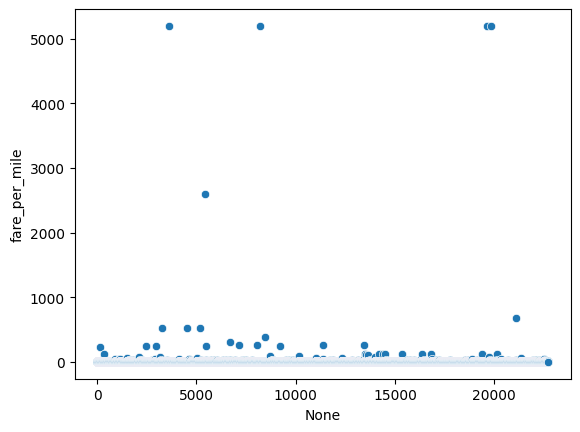

In [118]:
#거리/요금 환산한 것에서 이상치 확인  
sns.scatterplot(x=df_taxi.index, y=df_taxi['fare_per_mile'])

In [ ]:
#fare per mile 2000이상인 경우 아웃라이어로 판단 삭제하기 -> 비용에 비해 거리가 이상하게 적은 경우 
df_taxi = df_taxi[df_taxi['fare_per_mile'] < 2000]

<Axes: xlabel='None', ylabel='tip_amount'>

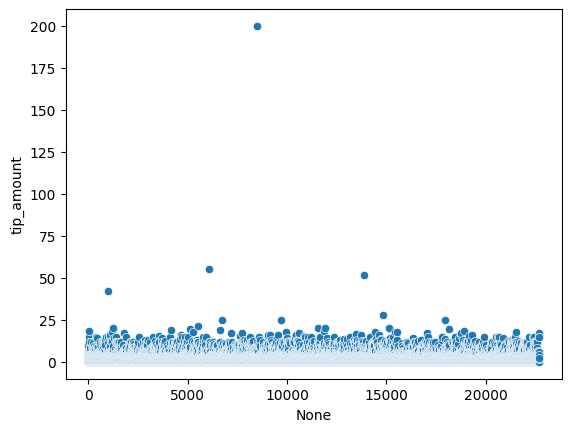

In [120]:
#마지막으로, tip_amount 확인 
sns.scatterplot(x=df_taxi.index, y=df_taxi['tip_amount'])

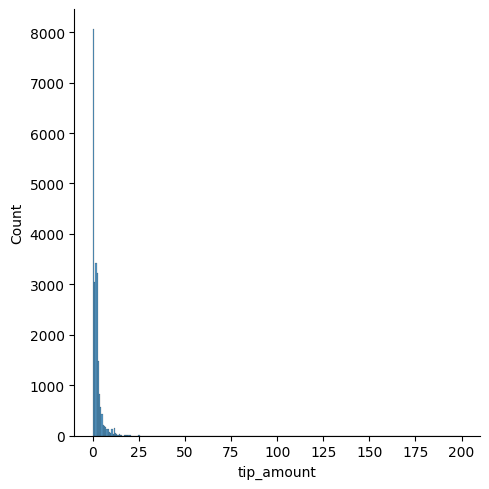

In [121]:
#구간 확인하기
sns.displot(df_taxi['tip_amount'])

In [ ]:
#아웃라이어는 가장 큰 값 범위에 넣어주기. 팁은 많이 줄 수도 있고, 상관관계 분석하고자 해서, outlier는 편입 시켜줘도 괜찮을 것이라 판단
df_taxi['tip_amount'].sort_values(ascending=False).head(50)

8478     200.00
6066      55.50
13863     51.64
986       42.29
14827     28.00
6710      25.20
9716      25.20
17936     25.00
5538      21.30
15111     20.00
1254      20.00
11904     20.00
11544     20.00
18132     19.85
5126      19.55
4140      18.95
6643      18.92
30        18.56
18890     18.36
11865     18.15
9934      18.05
5273      17.88
21507     17.87
15423     17.70
1181      17.57
14439     17.57
15523     17.55
1786      17.50
17048     17.45
7748      17.36
18756     17.19
7169      17.19
10611     17.15
22670     17.08
13498     16.66
10453     15.96
9131      15.96
18753     15.95
4671      15.84
9042      15.84
1112      15.80
19339     15.80
9530      15.76
13713     15.75
14617     15.75
19182     15.71
10877     15.56
7629      15.32
3543      15.26
5921      15.00
Name: tip_amount, dtype: float64

In [123]:
#두 번째로 큰 값으로 바꿔주기 
sorted_tips = df_taxi['tip_amount'].sort_values(ascending=False)
second_max = sorted_tips.iloc[1]
print(second_max)

55.5


In [124]:
#Step 4. 중복된 데이터, 데이터 타입 정리하기 
#중복된 행 확인
df_taxi[df_taxi.duplicated()]
#두 행만 나오고, 완전 중복된 값도 아니라, 중복값은 제거는 X

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,fare_per_mile
17,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,3.472222
204,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,5.000000


In [125]:
#타는시간 데이터를 만들기 위해 datetime함수 변경
#현재 탑승시간/하차시간은 문자열(object)
df_taxi['tpep_pickup_datetime'] = pd.to_datetime(df_taxi['tpep_pickup_datetime'])
df_taxi['tpep_dropoff_datetime'] = pd.to_datetime(df_taxi['tpep_dropoff_datetime'])

In [126]:
#타는 시간(분)을 열로 지정
df_taxi['ride_duration_min'] = (df_taxi['tpep_dropoff_datetime'] - df_taxi['tpep_pickup_datetime']).dt.total_seconds() / 60

In [ ]:
#카드,현금 사용에 따른 분석을 위한 카드 열 정리
df_taxi['payment_method'].value_counts()



In [127]:
#debit card와 credit카드를 Card로 바꾸기
df_taxi['payment_method'] = df_taxi['payment_method'].replace({
    'Debit Card': 'Card',
    'Credit Card': 'Card'
})

In [128]:
#전처리 완료된 데이터프레임 보기
df_taxi

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,fare_per_mile,ride_duration_min
0,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,3.892216,14.066667
1,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,8.888889,26.500000
2,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,6.500000,7.200000
3,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,5.540541,30.250000
4,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,3.775744,16.716667
...,...,...,...,...,...,...,...,...,...
22696,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,6.557377,3.266667
22697,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,3.111909,40.800000
22698,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,10.714286,4.133333
22699,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,4.449153,11.933333


In [ ]:
#전처리완료!